<a href="https://colab.research.google.com/github/hyo250/gittest/blob/master/taitanic_%EB%94%94%EC%B9%B4%ED%94%84%EB%A6%AC%EC%98%A4_%EC%83%9D%EC%A1%B4%EC%97%AC%EB%B6%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content/drive/MyDrive/인공지능실습/모두의 딥러닝

/content/drive/MyDrive/인공지능실습/모두의 딥러닝


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_excel('./dataset/titanic.xls')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


- pclass : 객실 등급
- survived : 생존 유무
- sex : 성별
- age : 나이
- sibsp : 형제 혹은 부부의 수
- parch : 부모, 혹은 자녀의 수
- fare : 지불한 운임
- boat : 탈출한 보트가 있다면 boat 번호



In [3]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


suvived에서 0이죽음 1이 살았다니까 평균 38% 생존..

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


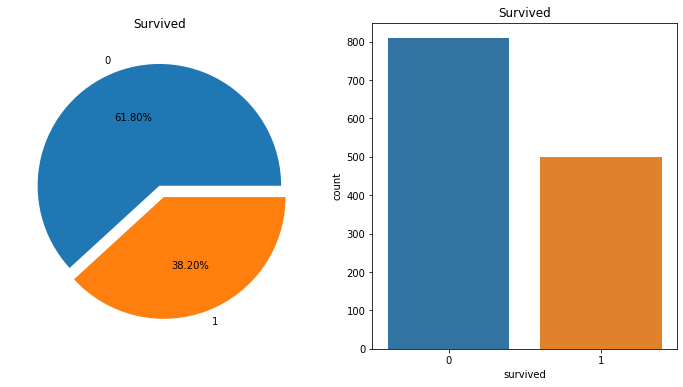

In [4]:
raw_data=df
f,ax=plt.subplots(1,2,figsize=(12,6))

raw_data['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived',data=raw_data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

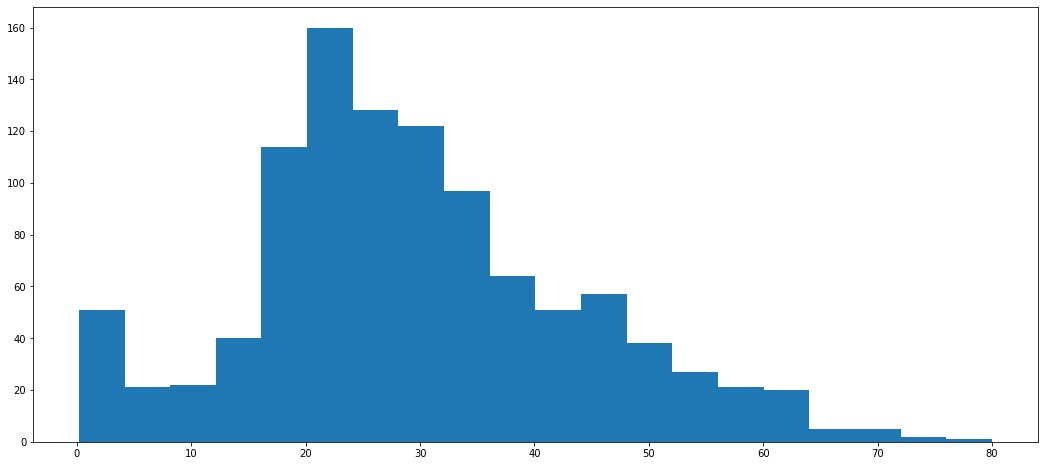

In [5]:
raw_data['age'].hist(bins=20,figsize=(18,8),grid=False); #연령대 분포

In [6]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [11]:
#선실 등급별 상황
df.groupby(['pclass'])['survived'].value_counts(ascending=False)
#1등실에서 생존자는 200, 2등실은 119, 3등실은 181... 

pclass  survived
1       1           200
        0           123
2       0           158
        1           119
3       0           528
        1           181
Name: survived, dtype: int64

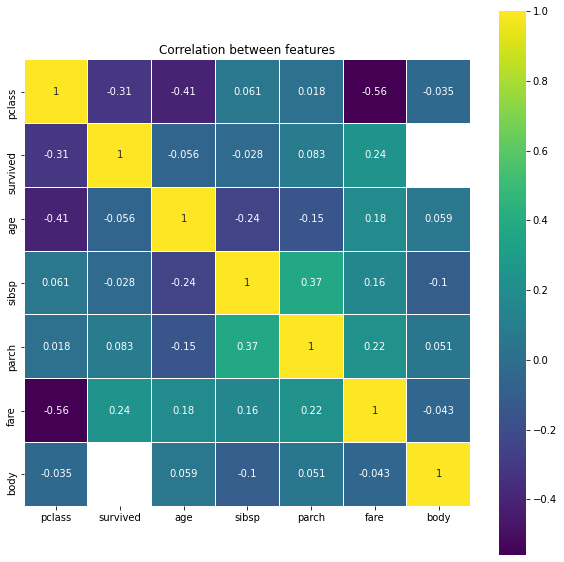

In [15]:
#전체 변수별 상관 살펴보기
plt.figure(figsize=(10, 10))
sns.heatmap(raw_data.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


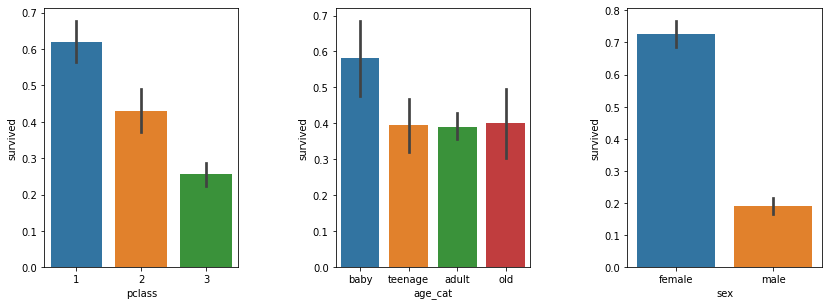

In [16]:
#연령대 나눠보기
raw_data['age_cat'] = pd.cut(raw_data['age'], bins=[0, 10, 20, 50, 100],  #0~10, 11~20, 21~50, 51~100로 구간
                             include_lowest=True, labels=['baby', 'teenage', 'adult', 'old'])
plt.figure(figsize=[12,4])
plt.subplot(131)
sns.barplot('pclass', 'survived', data=raw_data)
plt.subplot(132)
sns.barplot('age_cat', 'survived', data=raw_data)
plt.subplot(133)
sns.barplot('sex', 'survived', data=raw_data)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

- 1등석일수록 생존
- 어릴수록 생존
- 여자가 더 많이 생존함

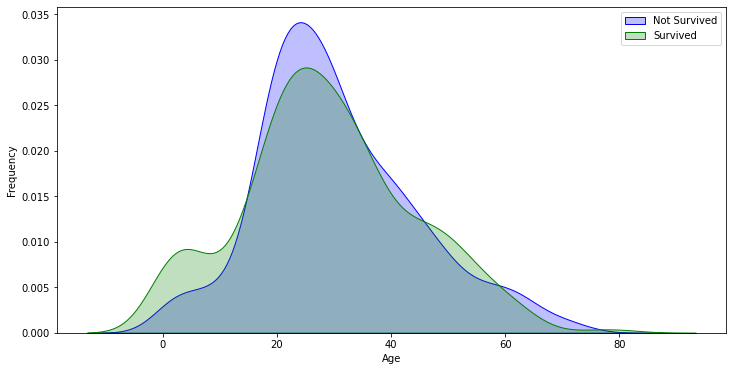

In [17]:
#연령별 생존곡선 분포
f,ax = plt.subplots(figsize=(12,6))
g = sns.kdeplot(raw_data["age"][(raw_data["survived"] == 0) & (raw_data["age"].notnull())], 
                ax = ax, color="Blue", shade = True)
g = sns.kdeplot(raw_data["age"][(raw_data["survived"] == 1) & (raw_data["age"].notnull())], 
                ax =g, color="Green", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


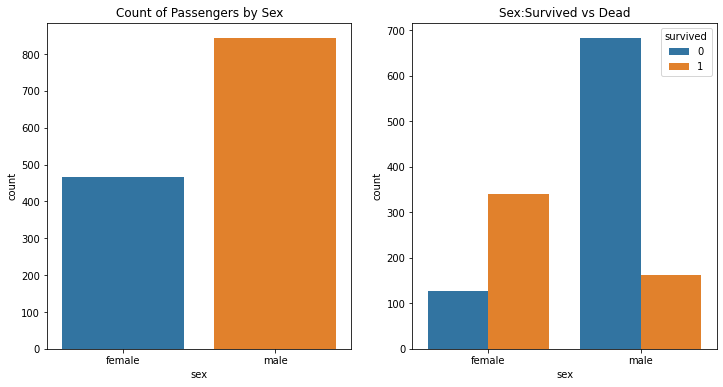

In [19]:
#성별에 따른 생존 분포
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot('sex',data=raw_data, ax=ax[0])
ax[0].set_title('Count of Passengers by Sex')

sns.countplot('sex',hue='survived',data=raw_data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

- 남자들이 더 많은데 남자들이 더 많은 비율로 죽음

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


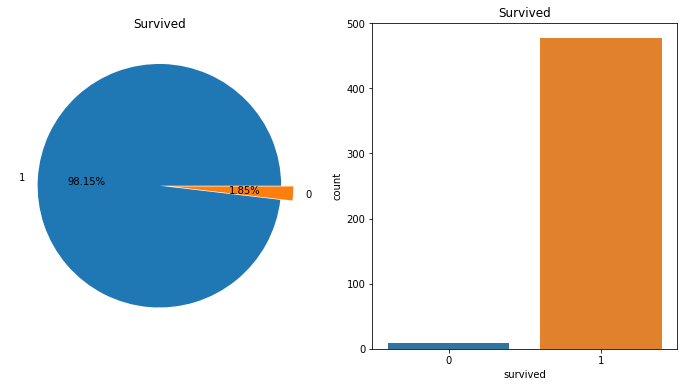

In [20]:
#구명보트 탄 사람들의 생존분포
boat_survivors = raw_data[raw_data['boat'].notnull()]
f,ax=plt.subplots(1,2,figsize=(12,6))

boat_survivors['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived',data=boat_survivors,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

# 딥러닝을 이용한 생존 가능성 예측

In [21]:
tmp = []
for each in raw_data['sex']:
    if each == 'female': #여자는 1로 넣기.
        tmp.append(1)
    elif each == 'male':
        tmp.append(0) #남자는 0
    else:
        tmp.append(np.nan)

raw_data['sex'] = tmp #숫자로 표현한 성별 컬럼

#모델링을 위해 데이터 타입 수치형으로 변환
raw_data['survived'] = raw_data['survived'].astype('float')
raw_data['pclass'] = raw_data['pclass'].astype('float')
raw_data['sex'] = raw_data['sex'].astype('float')
raw_data['sibsp'] = raw_data['sibsp'].astype('float')
raw_data['parch'] = raw_data['parch'].astype('float')
raw_data['fare'] = raw_data['fare'].astype('float')

#좀 위험하지만... 빈값들은 아예 제거해버림(이건 내가 다시보고 적당한 값으로 대체해도 됨.)
raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sibsp'].notnull()]
raw_data = raw_data[raw_data['parch'].notnull()]
raw_data = raw_data[raw_data['fare'].notnull()]

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   float64 
 1   survived   1045 non-null   float64 
 2   name       1045 non-null   object  
 3   sex        1045 non-null   float64 
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   float64 
 6   parch      1045 non-null   float64 
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
dtypes: category(1), float64(8), object(6)
memory usage: 123.7+ KB


In [22]:
#모델에 넣을 데이터 선별
x_data = raw_data.values[:, [0,3,4,5,6,8]]  #pclass, sex, age, sibsp, fare 아까 위에서 본 것중 상관높을법한것들.
y_data = raw_data.values[:, [1]] #'[1]='survived'

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, 
                                                    test_size=0.1, random_state=7)

In [23]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Dense
np.random.seed(7)

print('tensorflow version : ', tf.__version__)
print('keras version : ', keras.__version__)

tensorflow version :  2.5.0
keras version :  2.5.0


In [24]:
model = Sequential()
model.add(Dense(255, input_shape=(6,), activation='relu'))
model.add(Dense((1), activation='sigmoid'))
model.compile(loss='mse', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 255)               1785      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 256       
Total params: 2,041
Trainable params: 2,041
Non-trainable params: 0
_________________________________________________________________


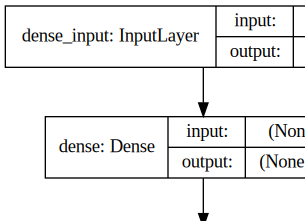

In [25]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [33]:
X_train=X_train.astype(float)
X_test=X_test.astype(float)
y_train=y_train.astype(float)
y_test=y_test.astype(float)
#x _test= np.asarray(x_test).astype('float32') 이렇게 고쳐도 됨.


In [34]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)


Epoch 1/100
30/30 [==============================] - 0s 4ms/step - loss: 0.1396 - accuracy: 0.8191 - val_loss: 0.1482 - val_accuracy: 0.7905
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 0.1425 - accuracy: 0.7968 - val_loss: 0.1545 - val_accuracy: 0.8190
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.1408 - accuracy: 0.8106 - val_loss: 0.1555 - val_accuracy: 0.8190
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 0.1398 - accuracy: 0.8138 - val_loss: 0.1536 - val_accuracy: 0.8000
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 0.1376 - accuracy: 0.8170 - val_loss: 0.1454 - val_accuracy: 0.8095
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 0.1343 - accuracy: 0.8117 - val_loss: 0.1517 - val_accuracy: 0.7810
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 0.1377 - accuracy: 0.8117 - val_loss: 0.1460 - val_accuracy: 0.8286
Epoch 8/100
3

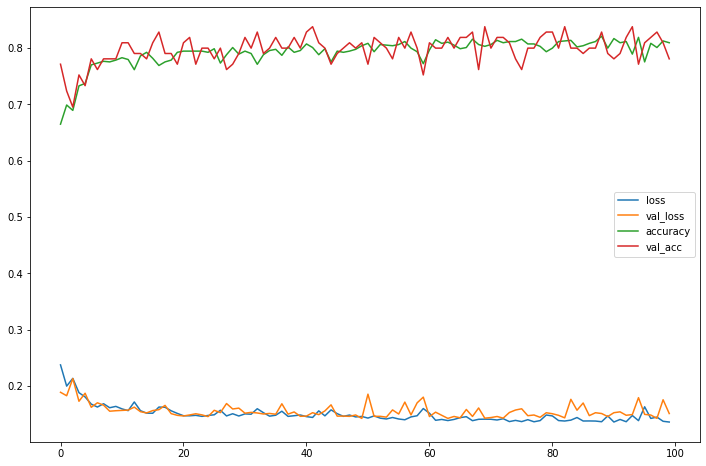

In [32]:

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy','val_acc'])
plt.show()

In [29]:
dicaprio = np.array([3., 0., 19., 0., 0., 5.]).reshape(1,6)
winslet = np.array([1., 1., 17., 1., 2., 100.]).reshape(1,6)

In [30]:
model.predict(dicaprio) #디카프리오 생존확률 18퍼..

array([[0.18671554]], dtype=float32)

In [31]:
model.predict(winslet) #윈슬렛은99퍼.. 이뤄질수없는사랑 ㅠㅋ.

array([[0.9952265]], dtype=float32)